# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

sns.set()

# Reading the datasets

Steps:
- Read the respective .csv file.
- Drop all redundant rows and columns
- Convert **Date** field from string to datetime format.
- Set **Date** as the index of the dataframe.

### Complete Dataset

In [2]:
data = pd.read_csv('web_scrapped_data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop([0], axis=0)
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')
# data = data.drop(['index'], axis=1)

### Train Dataset

In [3]:
df = pd.read_csv('train.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop([0], axis=0)
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
# df = df.drop(['index'], axis=1)

### Test Dataset

In [4]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop([0], axis=0)
df_test.Date = pd.to_datetime(df_test.Date)
df_test = df_test.set_index('Date')
# df_test = df_test.drop(['index'], axis=1)

# Auto ARIMAX for SPX Market Prices
In this section we try and predict the **SPX** market prices using the default **auto_arima** model along with the exogenous variables - **DAX**, **FTSE**, and **NIKKEI**.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [5]:
model_auto_arimax = auto_arima(df.spx, exogenous = df[['dax', 'ftse', 'nikkei']])

The summary statistics of the model.

In [6]:
print(model_auto_arimax.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5353
Model:               SARIMAX(1, 1, 5)   Log Likelihood              -20018.540
Date:                Thu, 02 Apr 2020   AIC                          40059.080
Time:                        18:17:46   BIC                          40131.518
Sample:                    01-06-1994   HQIC                         40084.381
                         - 07-14-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2392      0.150      1.598      0.110      -0.054       0.532
dax            0.0756      0.002     39.866      0.000       0.072       0.079
ftse           0.0571      0.003     21.219      0.0

### Specify a start date and an end date for predictions.

In [7]:
start_date = '2014-07-15'
end_date = '2019-08-30'

### Use the model to predict the values for the dates defined.

In [8]:
pred = pd.DataFrame(model_auto_arimax.predict(n_periods = len(df_test[start_date:end_date]), 
                    exogenous = df_test[['dax', 'ftse', 'nikkei']][start_date:end_date]),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

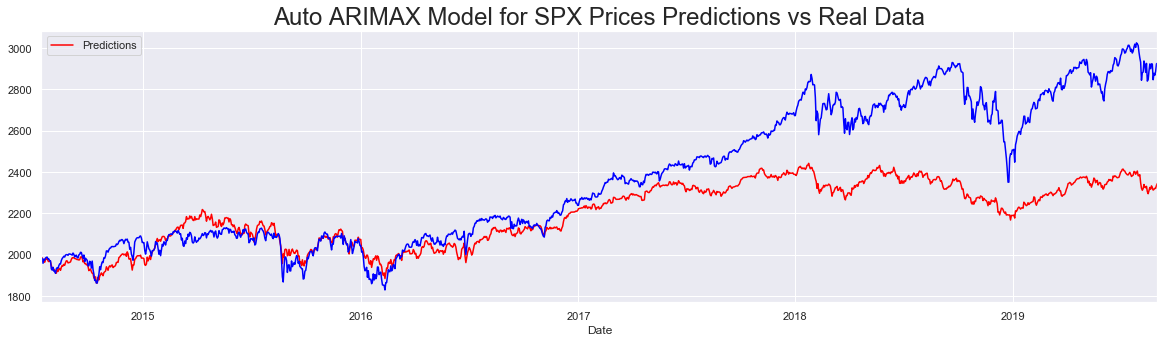

In [9]:
pred.plot(figsize = (20,5), color = "red")
df_test.spx[start_date:end_date].plot(color = "blue")
plt.title("Auto ARIMAX Model for SPX Prices Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [10]:
mse = mean_squared_error(df_test.spx.values, pred.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 272.68926874239105


# Auto ARIMAX for Normalized SPX Market Prices
In this section we try and predict the Normalized SPX **(spx_norm)** market prices using the default **auto_arima** model and the Normalized exogenous variables - **dax_norm**, **ftse_norm**, and **nikkei_norm**.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [11]:
model_auto_arimax_norm = auto_arima(df.spx_norm, exogenous = df[['dax_norm', 'ftse_norm', 'nikkei_norm']])

The summary statistics of the model.

In [12]:
print(model_auto_arimax_norm.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5353
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -11769.228
Date:                Thu, 02 Apr 2020   AIC                          23558.457
Time:                        18:18:56   BIC                          23624.309
Sample:                    01-06-1994   HQIC                         23581.458
                         - 07-14-2014                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0254      0.017      1.500      0.134      -0.008       0.059
dax_norm        0.3595      0.009     39.798      0.000       0.342       0.377
ftse_norm       0.4178      0.020     21.285    

### Specify a start date and an end date for predictions.

In [13]:
start_date = '2014-07-15'
end_date = '2019-08-30'

### Use the model to predict the values for the dates defined.

In [14]:
pred_norm = pd.DataFrame(model_auto_arimax_norm.predict(n_periods = len(df_test[start_date:end_date]),
                        exogenous = df_test[['dax_norm', 'ftse_norm', 'nikkei_norm']][start_date:end_date]),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

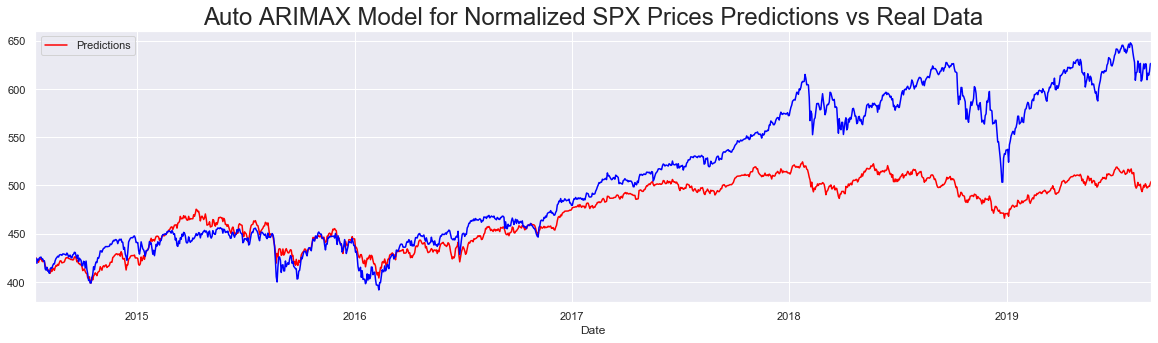

In [15]:
pred_norm.plot(figsize = (20,5), color = "red")
df_test.spx_norm[start_date:end_date].plot(color = "blue")
plt.title("Auto ARIMAX Model for Normalized SPX Prices Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [16]:
mse = mean_squared_error(df_test.spx_norm.values, pred_norm.values)
rmse = sqrt(mse)

print("Root Mean Squared Error - "+str(rmse))

Root Mean Squared Error - 57.23456445378575


# Auto ARIMAX for SPX Market Returns
In this section we try and predict the SPX market returns (**spx_ret**) using the default **auto_arima** model and the exogenous returns - **dax_ret**, **ftse_ret**, and **nikkei_ret**.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [17]:
model_auto_arimax_ret = auto_arima(df.spx_ret[1:], exogenous = df[['dax_ret', 'ftse_ret', 'nikkei_ret']][1:])

The summary statistics of the model.

In [18]:
print(model_auto_arimax_ret.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5352
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -7134.610
Date:                Thu, 02 Apr 2020   AIC                          14285.220
Time:                        18:19:32   BIC                          14337.902
Sample:                    01-07-1994   HQIC                         14303.621
                         - 07-14-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0037      0.002      1.523      0.128      -0.001       0.008
dax_ret        0.3397      0.009     39.561      0.000       0.323       0.357
ftse_ret       0.2684      0.012     23.280      0.0

### Specify a start date and an end date for predictions.

In [19]:
start_date = '2014-07-15'
end_date = '2019-08-30'

### Use the model to predict the values for the dates defined.

In [20]:
pred_ret = pd.DataFrame(model_auto_arimax_ret.predict(n_periods = len(df_test[start_date:end_date]),
                        exogenous = df_test[['dax_ret', 'ftse_ret', 'nikkei_ret']]),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

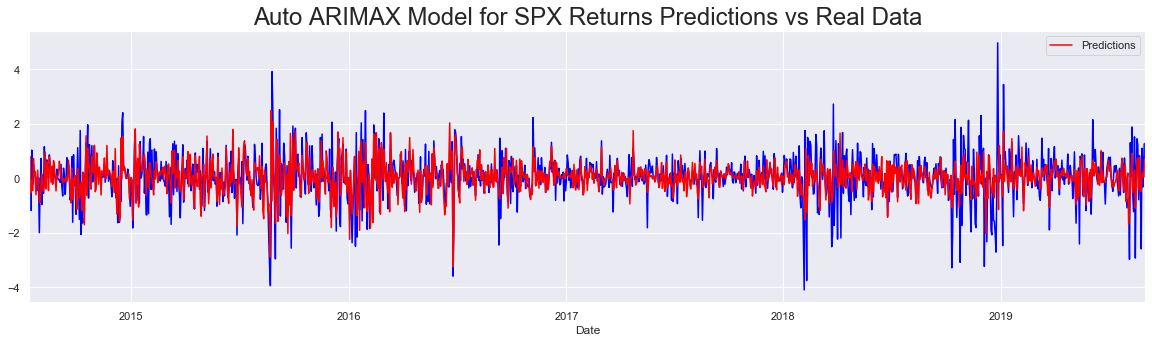

In [21]:
pred_ret.plot(figsize = (20,5), color = "red", zorder=2)
df_test.spx_ret[start_date:end_date].plot(color = "blue", zorder=1)
plt.title("Auto ARIMAX Model for SPX Returns Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [22]:
mse = mean_squared_error(df_test.spx_ret.values, pred_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error - "+str(rmse))

Root Mean Squared Error - 0.7176203060394123
